In [2]:
import pandas as pd

import sys  
sys.path.append('../')

import modules.exploratory_data_analysis.base_rates as base_rates

import modules.data_wrangling.feature_selection as feature_selection

import modules.classification.classifiers as classifiers
import modules.classification.classifiers_comparison as classifiers_comparison
import modules.classification.disparity_score as disparity_score
import modules.classification.disparity_score_by_category as disparity_score_by_category
import modules.classification.probabilities as probabilities

from importlib import reload
classifiers = reload(classifiers) 

# Load data

In [4]:
df = pd.read_csv("..\..\output\df_cleaned.csv", sep=";")
df.head()

,ID,URL,DATE,YEAR,HQ,AUT_COMM,JUDGE_ID,JUDGE_ML,PLAIN_ML,DEFEN_ML,...,LN_JNPREF_b,LN_JNPREF,CD_JOINT,CD_JO_CF,WIN_SL,WINWIN,CD_FH_AT,CD_FH_SP,CD_MP_AT,CD_MP_SP
0,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,43362,2018,Alicante,Comunidad Valenciana,0,1,1,0,...,0,0.0,0,0,0,0,0,0,1,0
1,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,43621,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0
2,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,43607,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,1,0,1,0
3,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,43600,2019,Alicante,Comunidad Valenciana,2,0,1,0,...,0,0.0,0,0,0,0,0,0,1,0
4,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,43818,2019,Barcelona,Cataluña,3,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0


## Load extra info

In [5]:
features_classification_lists = feature_selection.features_classification_lists(file_name = r"..\..\data\features_classification.csv")
features_classification_lists

Group
Court decisions            [CD_JOINT, CD_JO_CF, WIN_SL, WINWIN, CD_FH_AT,...
Defendants's gender                                               [DEFEN_ML]
Facts                      [FT_RP_b, FT_RP, FT_CW_b, FT_CW, FT_CC_b, FT_C...
Facts detail               [FT_RP_SL_b, FT_RP_SL, FT_RP_JN_b, FT_RP_JN, F...
Facts index                     [FT_SL_IN_b, FT_JN_IN_b, FT_SL_IN, FT_JN_IN]
Judge gender                                                      [JUDGE_ML]
Judicial resolution                                    [ID, URL, DATE, YEAR]
Legal norms                                         [LN_JNPREF_b, LN_JNPREF]
Legal principles           [LP_BI_b, LP_BI, LP_PE_b, LP_PE, LP_RA_b, LP_R...
Legal principles detail    [LP_BI_SL_b, LP_BI_SL, LP_BI_JN_b, LP_BI_JN, L...
Plainfiff's gender                                                [PLAIN_ML]
Plainfiff's requests       [RQ_JOINT, RQ_FH_AT, RQ_FH_SP, RQ_MP_AT, RQ_MP...
Name: Short name, dtype: object

In [6]:
added_features_list = ["HQ", "AUT_COMM","JUDGE_ID"]
categorical_features = features_classification_lists["Judicial resolution"] + added_features_list

# Classification models

## Judicial decision prediction model

<div>

<p>
The judicial decision is represented by the "WINWIN" attribute which corresponds to the court decision with respect to the sole/joint custody request. Is is 1 when the court decides sole custody or joint custody as the plaintiff has requested, and 0 if it decides the opposite as the plaintiff requested. </p>

</div>

In [7]:
hide_cols = categorical_features + ["DEFEN_ML"] + features_classification_lists["Court decisions"]

In [6]:
classifiers_comparison.model_comparison(df, "WINWIN", hide_cols)

LogReg - 0.567
RandomForest - 0.881
SVM linear - 0.614
SVM RBF kernel - 0.597
AdaBoost - 0.557


Balanced accuracy mean: 0.8817904682662479


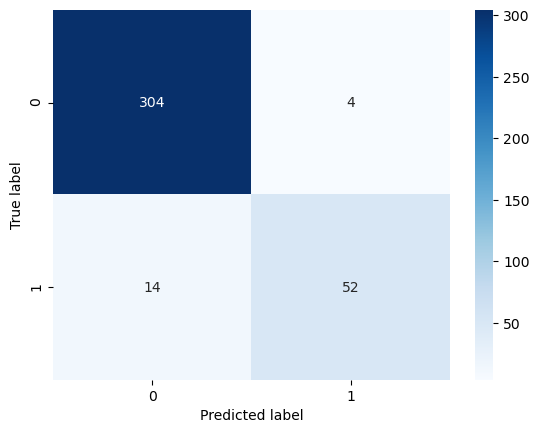

In [7]:
feature_importances_winwin = classifiers.rf_classifier(df, "WINWIN", hide_cols)

In [8]:
feature_importances_winwin = classifiers.sort_feature_importances(feature_importances_winwin)
feature_importances_winwin.head(10)

,features,coefficients,std
0,RQ_JOINT,0.191533,0.006265
1,FT_RA,0.080875,0.002393
2,LP_BI,0.073319,0.003235
3,FT_RD,0.068486,0.002009
4,FT_CC,0.063560,0.002852
5,PLAIN_ML,0.060000,0.004264
6,LP_BI_b,0.055127,0.001842
7,FT_CC_b,0.049354,0.001585
8,FT_RA_b,0.035978,0.002743
9,RQ_MP_SP,0.032747,0.002079


In [9]:
feature_importances_winwin

,features,coefficients,std
0,RQ_JOINT,0.191533,0.006265
1,FT_RA,0.080875,0.002393
2,LP_BI,0.073319,0.003235
3,FT_RD,0.068486,0.002009
4,FT_CC,0.063560,0.002852
5,PLAIN_ML,0.060000,0.004264
6,LP_BI_b,0.055127,0.001842
7,FT_CC_b,0.049354,0.001585
8,FT_RA_b,0.035978,0.002743
9,RQ_MP_SP,0.032747,0.002079


In [10]:
print(feature_importances_winwin['features'].to_list())

['RQ_JOINT', 'FT_RA', 'LP_BI', 'FT_RD', 'FT_CC', 'PLAIN_ML', 'LP_BI_b', 'FT_CC_b', 'FT_RA_b', 'RQ_MP_SP', 'RQ_MP_AT', 'FT_CW', 'FT_RD_b', 'FT_PD', 'FT_CR', 'FT_RP', 'FT_PD_b', 'FT_CW_b', 'FT_RP_b', 'FT_CR_b', 'JUDGE_ML', 'LP_RA', 'FT_AG', 'LP_RA_b', 'FT_AG_b', 'RQ_FH_AT', 'LN_JNPREF', 'RQ_FH_SP', 'LP_PE', 'LP_PE_b', 'LP_RJ_b', 'LP_RJ', 'LN_JNPREF_b']


In [11]:
print(feature_importances_winwin['coefficients'].to_list())

[0.19153341937194562, 0.08087460405713365, 0.07331899080512075, 0.0684861681380746, 0.06355989729329779, 0.06000002071131096, 0.05512691095949846, 0.04935436069083849, 0.03597750276978979, 0.032747256121583114, 0.03062024148188076, 0.028400573761974444, 0.02394548802779918, 0.023770257884209955, 0.021923860756904574, 0.02010013121728283, 0.016045330384165085, 0.01581513686625872, 0.01309825498580869, 0.012701663805358558, 0.012156053090317033, 0.010594728939702988, 0.009430012742184656, 0.008138637260480058, 0.007945205621726684, 0.0075279201416635945, 0.006154809579197631, 0.00552306721394635, 0.004696745192670966, 0.004025277749852578, 0.0037953352180547634, 0.0035682255324143144, 0.0027659441762789266]


### Judicial decision prediction model - no plaintiff gender

In [12]:
hide_cols_plaitiff_gender = hide_cols + ["PLAIN_ML"]

Balanced accuracy mean: 0.8817883803656319


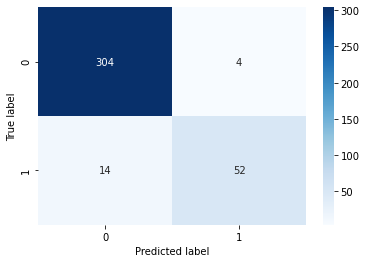

In [13]:
feature_importances_winwin_no_plaintiff_gender = classifiers.rf_classifier(df, "WINWIN", hide_cols_plaitiff_gender)

### Judicial decision prediction model - no judge gender

In [14]:
hide_cols_judge_gender = hide_cols + ["JUDGE_ML"]

Balanced accuracy mean: 0.8799753503076537


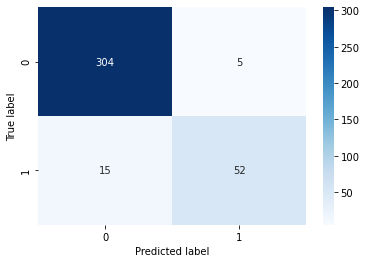

In [15]:
feature_importances_winwin_no_judge_gender = classifiers.rf_classifier(df, "WINWIN", hide_cols_judge_gender)

## Plaintiff gender prediction model

In [16]:
classifiers_comparison.model_comparison(df, "PLAIN_ML", hide_cols)

LogReg - 0.850
RandomForest - 0.824
SVM linear - 0.843
SVM RBF kernel - 0.843
AdaBoost - 0.802


Balanced accuracy mean: 0.8504044546671345


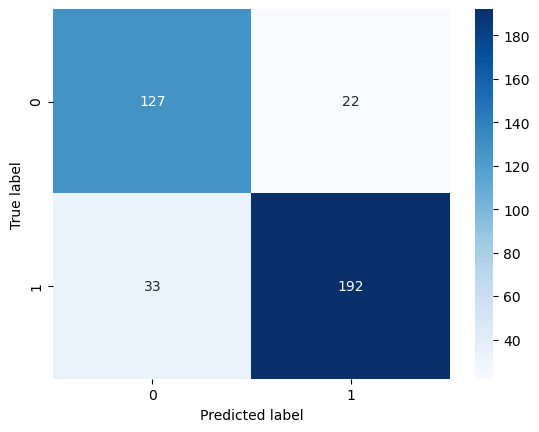

In [17]:
feature_importances_plain = classifiers.lr_classifier(df, "PLAIN_ML", hide_cols)

In [18]:
feature_importances_plain = classifiers.sort_feature_importances(feature_importances_plain)
print(feature_importances_plain.head())
print(feature_importances_plain.tail())

   features  coefficients       std
0  RQ_JOINT      2.874478  0.100822
1  RQ_MP_SP      0.957701  0.106847
2   FT_PD_b      0.893988  0.122781
3     FT_CR      0.702986  0.213482
4  RQ_FH_SP      0.434315  0.037296
       features  coefficients       std
27        FT_RD     -0.460916  0.218647
28     RQ_MP_AT     -0.480660  0.050144
29  LN_JNPREF_b     -0.531718  0.066109
30      FT_RD_b     -0.535645  0.117530
31        LP_BI     -0.907910  0.235982


### Plaintiff gender prediction model - sole custody

In [8]:
df_request_sole, df_request_joint = base_rates.df_by_group(df, "RQ_JOINT")

In [20]:
classifiers_comparison.model_comparison(df_request_sole, "PLAIN_ML", hide_cols)

LogReg - 0.587
RandomForest - 0.585
SVM linear - 0.572
SVM RBF kernel - 0.500
AdaBoost - 0.588


Balanced accuracy mean: 0.5881780400541036


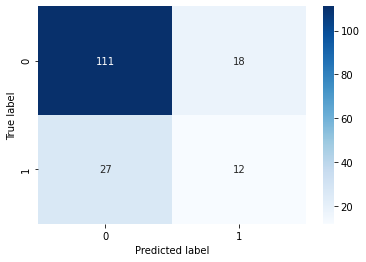

In [21]:
feature_importances_plain_sole = classifiers.ab_classifier(df_request_sole, "PLAIN_ML", hide_cols)

In [22]:
feature_importances_plain_sole = classifiers.sort_feature_importances(feature_importances_plain_sole)
feature_importances_plain_sole.head()

,features,coefficients,std
0,FT_RD,0.261,0.053169
1,FT_RA,0.137,0.032701
2,FT_PD,0.115,0.022357
3,FT_CC,0.109,0.045137
4,LP_BI,0.076,0.006524


### Plaintiff gender prediction model - joint custody

In [23]:
classifiers_comparison.model_comparison(df_request_joint, "PLAIN_ML", hide_cols)

LogReg - 0.500
RandomForest - 0.502
SVM linear - 0.500
SVM RBF kernel - 0.500
AdaBoost - 0.505


Balanced accuracy mean: 0.505165857101341


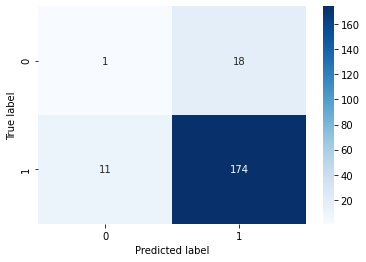

In [24]:
feature_importances_plain_joint = classifiers.ab_classifier(df_request_joint, "PLAIN_ML", hide_cols)

In [25]:
feature_importances_plain_joint = classifiers.sort_feature_importances(feature_importances_plain_joint)
feature_importances_plain_joint.head()

,features,coefficients,std
0,LP_BI,0.248,0.052930
1,FT_RD,0.207,0.056357
2,FT_RA,0.181,0.032699
3,FT_CW,0.092,0.021266
4,FT_CC,0.060,0.014926


## Judge gender prediction model

<div class="alert alert-block alert-info col-md-12">

<p>
Can we predict the gender of the judge based on the sentence features with sufficient accuracy?
</p>

</div>

In [26]:
classifiers_comparison.model_comparison(df, "JUDGE_ML", hide_cols)

LogReg - 0.501
RandomForest - 0.510
SVM linear - 0.500
SVM RBF kernel - 0.500
AdaBoost - 0.516


Balanced accuracy mean: 0.5163837765214347


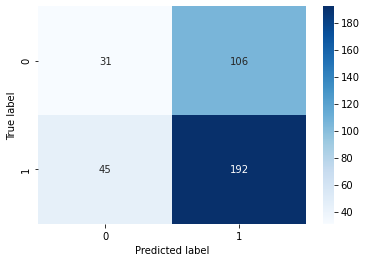

In [27]:
feature_importances_judge = classifiers.ab_classifier(df, "JUDGE_ML", hide_cols)

In [28]:
feature_importances_judge = classifiers.sort_feature_importances(feature_importances_judge)
feature_importances_judge.head()

,features,coefficients,std
0,FT_RD,0.270,0.038962
1,FT_RA,0.220,0.033518
2,LP_BI,0.159,0.023404
3,FT_CR,0.113,0.028849
4,FT_CC,0.059,0.011214


### Judge gender prediction model - sole custody

In [29]:
classifiers_comparison.model_comparison(df_request_sole, "JUDGE_ML", hide_cols)

LogReg - 0.497
RandomForest - 0.541
SVM linear - 0.500
SVM RBF kernel - 0.500
AdaBoost - 0.531


Balanced accuracy mean: 0.5305459647276753


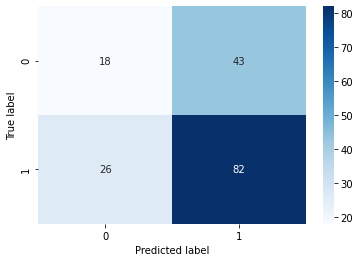

In [30]:
feature_importances_judge_sole = classifiers.ab_classifier(df_request_sole, "JUDGE_ML", hide_cols)

In [31]:
feature_importances_judge_sole = classifiers.sort_feature_importances(feature_importances_judge_sole)
feature_importances_judge_sole.head()

,features,coefficients,std
0,FT_RD,0.377,0.063294
1,FT_RA,0.155,0.017095
2,FT_CR,0.087,0.026234
3,LP_BI,0.078,0.014959
4,FT_CC,0.073,0.027332


### Judge gender prediction model - joint custody

In [32]:
classifiers_comparison.model_comparison(df_request_joint, "JUDGE_ML", hide_cols)

LogReg - 0.493
RandomForest - 0.486
SVM linear - 0.500
SVM RBF kernel - 0.500
AdaBoost - 0.484


Balanced accuracy mean: 0.4836280660547434


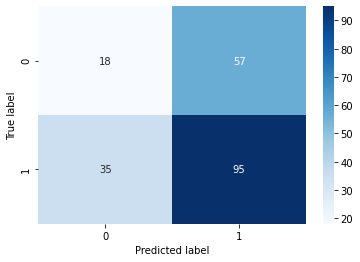

In [33]:
feature_importances_judge_joint = classifiers.ab_classifier(df_request_joint, "JUDGE_ML", hide_cols)

In [34]:
feature_importances_judge_joint = classifiers.sort_feature_importances(feature_importances_judge_joint)
feature_importances_judge_joint.head()

,features,coefficients,std
0,FT_RD,0.296,0.063808
1,FT_RA,0.219,0.063323
2,LP_BI,0.196,0.051080
3,FT_PD,0.116,0.034753
4,FT_CR,0.038,0.009368


## Plaintiff gender disparities

<div class="alert alert-block alert-info col-md-12">

<p>

What are the differences between female and male plaintiffs when predicting the winning chances?

</p>

</div>

In [35]:
df_female_plaintiff, df_male_plaintiff = base_rates.df_by_group(df, "PLAIN_ML")

Balanced accuracy mean: 0.8261944087888855


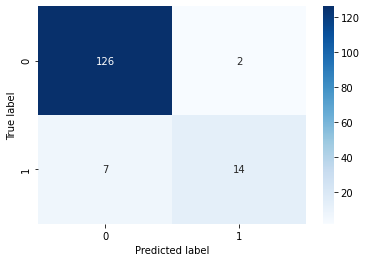

In [36]:
feature_importances_plain_female = classifiers.rf_classifier(df_female_plaintiff, "WINWIN", hide_cols)

Balanced accuracy mean: 0.8762445618811221


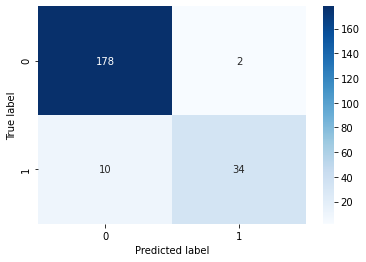

In [37]:
feature_importances_plain_male = classifiers.rf_classifier(df_male_plaintiff, "WINWIN", hide_cols)

In [38]:
df_disp_score_plain = disparity_score.disp_score_feature_importance(feature_importances_plain_female, feature_importances_plain_male)
df_disp_score_plain_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_plain)
df_disp_score_plain_above_thres

,features,coefficients_x,coefficients_y,disp_score
2,RQ_MP_AT,0.040490,0.019112,0.021378
3,FT_PD,0.039927,0.020338,0.019589
4,LP_BI,0.090195,0.072577,0.017618
5,FT_CC,0.078306,0.060900,0.017406
7,FT_CC_b,0.063842,0.047445,0.016397
8,FT_RD,0.098830,0.082892,0.015939
9,FT_PD_b,0.028032,0.014699,0.013333


In [39]:
df_disp_score_by_category_plain = disparity_score_by_category.create_categories_score_df(df_disp_score_plain, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_plain

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Procesal (economia del procedimiento),0.070433,0.055816,0.014616
1,Legal principles (general),0.032750,0.040834,-0.008085
2,Economical aspects,0.037553,0.033395,0.004158
3,Subjectivity (children),0.021531,0.019335,0.002196
4,"Personal circumstances (parents, children)",0.038853,0.036996,0.001857
5,Personal circumstances (children),0.002138,0.003950,-0.001812
6,Subjectivity (parents),0.017688,0.016524,0.001164


### Plaintiff gender disparities - sole custody

In [40]:
df_female_plaintiff_sole, df_male_plaintiff_sole = base_rates.df_by_group(df_request_sole, "PLAIN_ML")

Balanced accuracy mean: 0.8894506818848924


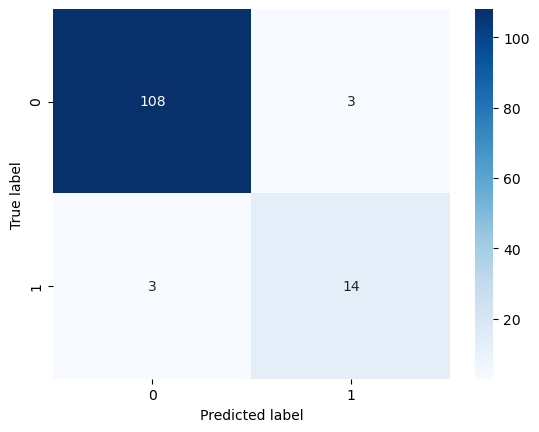

In [41]:
feature_importances_plain_female_sole = classifiers.rf_classifier(df_female_plaintiff_sole, "WINWIN", hide_cols)

Balanced accuracy mean: 0.8288095238095238


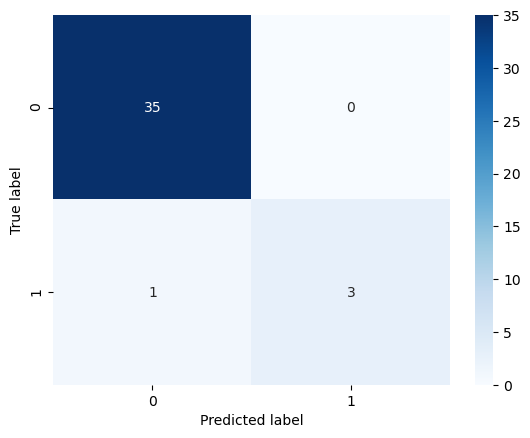

In [42]:
feature_importances_plain_male_sole = classifiers.rf_classifier(df_male_plaintiff_sole, "WINWIN", hide_cols)

In [43]:
df_disp_score_plain_sole = disparity_score.disp_score_feature_importance(feature_importances_plain_female_sole, feature_importances_plain_male_sole)
df_disp_score_plain_sole_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_plain_sole)
df_disp_score_plain_sole_above_thres

,features,coefficients_x,coefficients_y,disp_score
0,LP_BI_b,0.121971,0.068586,0.053386
1,LP_BI,0.142503,0.095299,0.047203
3,FT_RD,0.079708,0.053252,0.026456


In [44]:
df_disp_score_by_category_plain_sole = disparity_score_by_category.create_categories_score_df(df_disp_score_plain_sole, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_plain_sole

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Legal principles (general),0.066705,0.042980,0.023725
1,Economical aspects,0.018804,0.036754,-0.017950
2,Procesal (economia del procedimiento),0.031254,0.023572,0.007682
3,"Personal circumstances (parents, children)",0.032847,0.039432,-0.006585
4,Personal circumstances (children),0.016314,0.011579,0.004734
5,Subjectivity (children),0.121269,0.121733,-0.000463
6,Subjectivity (parents),0.001780,0.002235,-0.000455


### Plaintiff gender disparities - joint custody

In [45]:
df_female_plaintiff_joint, df_male_plaintiff_joint = base_rates.df_by_group(df_request_joint, "PLAIN_ML")

Balanced accuracy mean: 0.8691176470588236


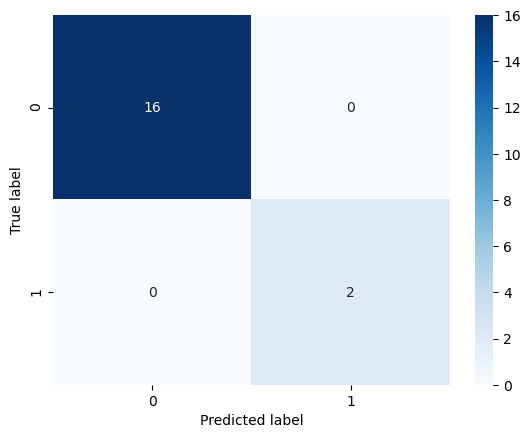

In [46]:
feature_importances_plain_female_joint = classifiers.rf_classifier(df_female_plaintiff_joint, "WINWIN", hide_cols)

Balanced accuracy mean: 0.9331917577796467


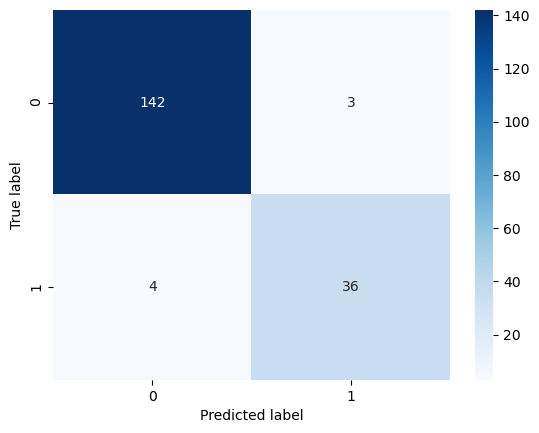

In [47]:
feature_importances_plain_male_joint = classifiers.rf_classifier(df_male_plaintiff_joint, "WINWIN", hide_cols)

In [48]:
df_disp_score_plain_joint = disparity_score.disp_score_feature_importance(feature_importances_plain_female_joint, feature_importances_plain_male_joint)
df_disp_score_plain_joint_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_plain_joint)
df_disp_score_plain_joint_above_thres

,features,coefficients_x,coefficients_y,disp_score
2,FT_RA,0.191250,0.137541,0.053709
3,FT_CR,0.048126,0.018698,0.029428
4,FT_CR_b,0.041132,0.013538,0.027594
5,LP_PE_b,0.021282,0.002165,0.019118
6,LP_PE,0.020621,0.002697,0.017924
7,FT_RD,0.072494,0.058289,0.014204
10,LP_RA_b,0.015426,0.004160,0.011266


In [50]:
df_disp_score_by_category_plain_joint = disparity_score_by_category.create_categories_score_df(df_disp_score_plain_joint, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_plain_joint

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Legal principles (general),0.044425,0.105100,-0.060675
1,Procesal (economia del procedimiento),0.033738,0.017475,0.016263
2,Subjectivity (children),0.035878,0.025813,0.010065
3,Economical aspects,0.046315,0.040893,0.005423
4,Subjectivity (parents),0.000438,0.003401,-0.002963
5,"Personal circumstances (parents, children)",0.080374,0.077475,0.002899
6,Personal circumstances (children),0.013160,0.014069,-0.000909


## Judge gender disparities

In [51]:
df_female_judge, df_male_judge = base_rates.df_by_group(df, "JUDGE_ML")

Balanced accuracy mean: 0.8813693471981988


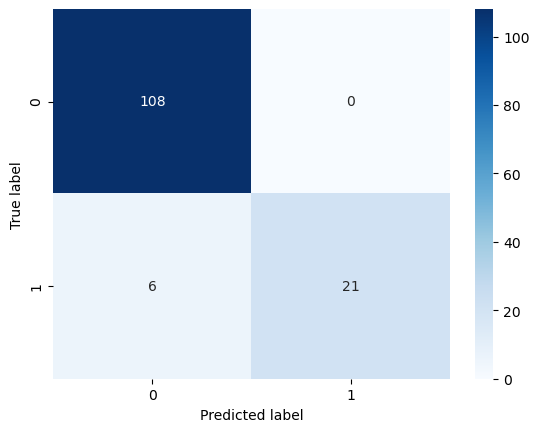

In [52]:
feature_importances_judge_female = classifiers.rf_classifier(df_female_judge, "WINWIN", hide_cols)

Balanced accuracy mean: 0.8304996982212005


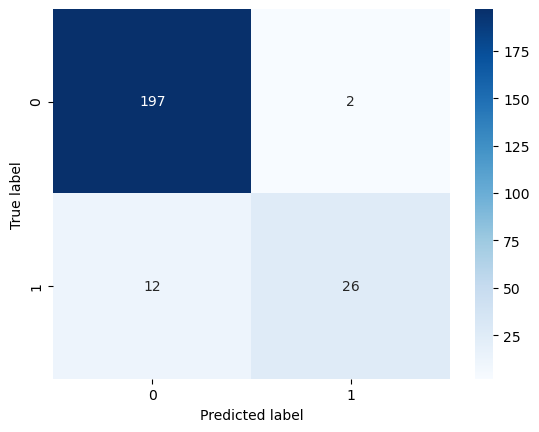

In [53]:
feature_importances_judge_male = classifiers.rf_classifier(df_male_judge, "WINWIN", hide_cols)

In [54]:
df_disp_score_judge = disparity_score.disp_score_feature_importance(feature_importances_judge_female, feature_importances_judge_male)
df_disp_score_judge_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_judge, threshold = 0.005)
df_disp_score_judge_above_thres

,features,coefficients_x,coefficients_y,disp_score
0,FT_CC,0.070523,0.056329,0.014194
3,RQ_MP_AT,0.035786,0.027196,0.008590
4,FT_PD,0.030807,0.022528,0.008279
6,FT_CR,0.029718,0.022237,0.007480
8,FT_AG,0.014673,0.007594,0.007079
9,FT_PD_b,0.020530,0.014494,0.006036
10,FT_CC_b,0.049987,0.044205,0.005781
11,FT_AG_b,0.012127,0.006793,0.005333


In [56]:
df_disp_score_by_category_judge = disparity_score_by_category.create_categories_score_df(df_disp_score_judge, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_judge

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Legal principles (general),0.060255,0.050267,0.009988
1,Procesal (economia del procedimiento),0.029347,0.032496,-0.003149
2,Economical aspects,0.032289,0.030145,0.002145
3,Subjectivity (parents),0.003074,0.004970,-0.001895
4,Personal circumstances (children),0.032590,0.034385,-0.001795
5,"Personal circumstances (parents, children)",0.023263,0.021634,0.001629
6,Subjectivity (children),0.018551,0.018576,-0.000025


### Judge gender disparities - sole custody

In [9]:
df_female_judge_sole, df_male_judge_sole = base_rates.df_by_group(df_request_sole, "JUDGE_ML")

Balanced accuracy mean: 0.9258686411627588


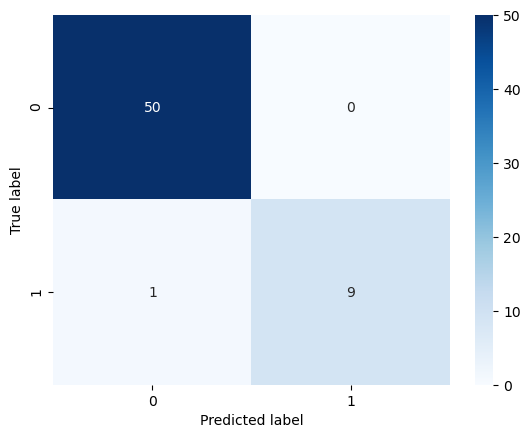

In [10]:
feature_importances_judge_female_sole = classifiers.rf_classifier(df_female_judge_sole, "WINWIN", hide_cols)

Balanced accuracy mean: 0.8477378542510122


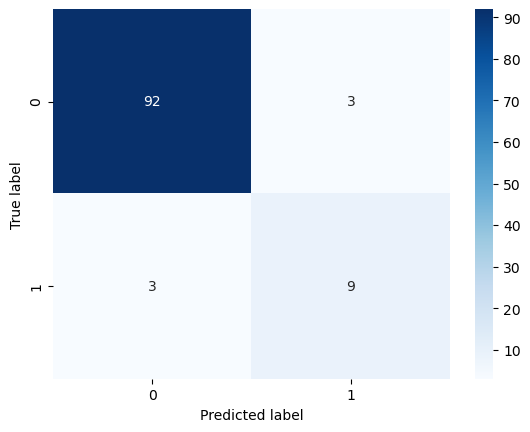

In [11]:
feature_importances_judge_male_sole = classifiers.rf_classifier(df_male_judge_sole, "WINWIN", hide_cols)

In [12]:
df_disp_score_judge_sole = disparity_score.disp_score_feature_importance(feature_importances_judge_female_sole, feature_importances_judge_male_sole)
df_disp_score_judge_sole_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_judge_sole)
df_disp_score_judge_sole_above_thres

,features,coefficients_x,coefficients_y,disp_score
1,FT_CC,0.147616,0.110802,0.036814
4,FT_CC_b,0.125038,0.106858,0.018180
5,LP_BI_b,0.115485,0.099582,0.015903


In [13]:
df_disp_score_by_category_judge_sole = disparity_score_by_category.create_categories_score_df(df_disp_score_judge_sole, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_judge_sole

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Economical aspects,0.136327,0.108830,0.027497
1,Legal principles (general),0.023774,0.037263,-0.013489
2,"Personal circumstances (parents, children)",0.064205,0.058356,0.005849
3,Personal circumstances (children),0.017390,0.013189,0.004201
4,Subjectivity (parents),0.001012,0.003715,-0.002703
5,Subjectivity (children),0.024207,0.022750,0.001457
6,Procesal (economia del procedimiento),0.035475,0.035073,0.000401


### Judge gender disparities - joint custody

In [14]:
df_female_judge_joint, df_male_judge_joint, = base_rates.df_by_group(df_request_joint, "JUDGE_ML")

Balanced accuracy mean: 0.9486590038314177


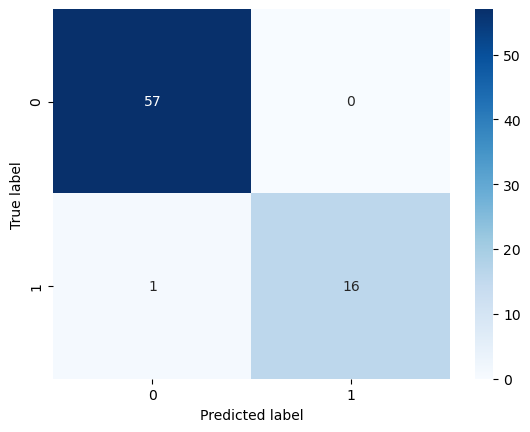

In [15]:
feature_importances_judge_female_joint = classifiers.rf_classifier(df_female_judge_joint, "WINWIN", hide_cols)

Balanced accuracy mean: 0.924065934065934


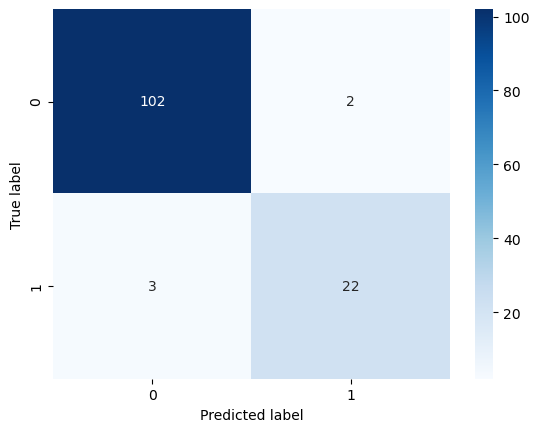

In [16]:
feature_importances_judge_male_joint = classifiers.rf_classifier(df_male_judge_joint, "WINWIN", hide_cols)

In [17]:
df_disp_score_judge_joint = disparity_score.disp_score_feature_importance(feature_importances_judge_female_joint, feature_importances_judge_male_joint)
df_disp_score_judge_joint_above_thres = disparity_score.disp_score_feature_importance_show_above_threshold(df_disp_score_judge_joint)
df_disp_score_judge_joint_above_thres

,features,coefficients_x,coefficients_y,disp_score
0,FT_CC_b,0.126029,0.075980,0.050049
1,FT_CC,0.124227,0.081907,0.042320


In [18]:
df_disp_score_by_category_judge_joint = disparity_score_by_category.create_categories_score_df(df_disp_score_judge_joint, file_name=r"..\..\data\feature_category.csv")
df_disp_score_by_category_judge_joint

,category,coefficients_x_mean,coefficients_y_mean,disp_score_mean
0,Legal principles (general),0.125128,0.078944,0.046184
1,Procesal (economia del procedimiento),0.074073,0.081307,-0.007234
2,"Personal circumstances (parents, children)",0.017077,0.021621,-0.004544
3,Subjectivity (children),0.024557,0.029080,-0.004523
4,Personal circumstances (children),0.001508,0.005422,-0.003913
5,Subjectivity (parents),0.015252,0.012612,0.002640
6,Economical aspects,0.040534,0.042662,-0.002127
